# San Joaquin Valley Township Reservoir Data and Stations

Related links:

* For the documentation about this dataset, its source, how to download, and the features of interest, please refer to our [Reservoir Reports Dataset](/doc/assets/precipitation.md) documentation.
* For the explanations about the Public Land Survey System Township Range, please refer to our [Public Land Survey System](../assets/plss_sanjoaquin_riverbasin.md) documentation.
* For the explanations on how we transform point measurements of reservoir by weather stations into township reservoir estimates, please refer to our [Transforming Point Values into Township Values](doc/etl/from_point_to_region_values.md) documentation.


In [1]:
import sys
sys.path.append('..')

In [2]:
import matplotlib.pyplot as plt
import altair as alt
from lib.reservoir_v2 import ReservoirDataset
from lib.viz_matplotlib import plot_townships_feature_per_year
from lib.viz_altair import  view_attribute_per_year, draw_base_map

/shared-libs/python3.9/py/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


By initializing the ReservoirDataset class, it automatically:
* scrapes the web to retrieve the reservoir data for the state of California (default is between 2013 and 2022)
* scrapes the web to retrieve the geospatial data of the reservoir stations in California

In [3]:
reservoir_dataset = ReservoirDataset()

Here is an overview of the reservoir data scrapped from the web.

In [4]:
reservoir_dataset.data_df.sample(5)

Reservoir Name STATION_ID  YEAR  PCT_OF_CAPACITY
208              STAMPEDE        STP  2019        91.307692
100         INDIAN VALLEY        INV  2018        77.888889
146  MC CLURE (EXCHEQUER)        EXC  2022        27.384615
177                PARDEE        PAR  2018        96.105263
32               CAMANCHE        CMN  2020        68.500000

By default the reservoir data are collected for the following years:

In [5]:
list(reservoir_dataset.data_df.YEAR.unique())

[2018, 2019, 2020, 2021, 2022]

Here is an overview of the reservoir stations geospatial data scraped from the web.

In [6]:
reservoir_dataset.map_df.sample(5)

0               STATION STATION_ID ELEV(FEET)   LATITUDE    LONGITUDE  \
67              BARRETT        BRT       1607  32.678001  -116.668999   
180  SAN LUIS RESERVOIR        SNL        543  37.033001  -121.133003   
72          SAN VICENTE        SVT        560  32.911999  -116.924004   
37           WHALE ROCK        WHR        233  35.450001  -120.883003   
170     THOMAS A EDISON        TAE       7642  37.369999  -118.987000   

0             COUNTY                     geometry  
67         SAN DIEGO  POINT (-116.66900 32.67800)  
180           MERCED  POINT (-121.13300 37.03300)  
72         SAN DIEGO  POINT (-116.92400 32.91200)  
37   SAN LUIS OBISPO  POINT (-120.88300 35.45000)  
170           FRESNO  POINT (-118.98700 37.37000)

In [7]:
reservoir_dataset.preprocess_map_df()
reservoir_dataset.merge_map_with_data("inner")
reservoir_dataset.map_df

LATITUDE    LONGITUDE   COUNTY                     geometry  \
0    40.800999  -122.762001  TRINITY  POINT (-122.76200 40.80100)   
1    40.800999  -122.762001  TRINITY  POINT (-122.76200 40.80100)   
2    40.800999  -122.762001  TRINITY  POINT (-122.76200 40.80100)   
3    40.800999  -122.762001  TRINITY  POINT (-122.76200 40.80100)   
4    40.800999  -122.762001  TRINITY  POINT (-122.76200 40.80100)   
..         ...          ...      ...                          ...   
232  39.322777  -120.264397   NEVADA  POINT (-120.26440 39.32278)   
233  39.322777  -120.264397   NEVADA  POINT (-120.26440 39.32278)   
234  39.322777  -120.264397   NEVADA  POINT (-120.26440 39.32278)   
235  39.322777  -120.264397   NEVADA  POINT (-120.26440 39.32278)   
236  39.322777  -120.264397   NEVADA  POINT (-120.26440 39.32278)   

    Reservoir Name  YEAR  PCT_OF_CAPACITY  
0     TRINITY LAKE  2018        67.605263  
1     TRINITY LAKE  2019        82.615385  
2     TRINITY LAKE  2020        68.882353  
3     TRINITY LAKE  2021        42.519231  
4     TRINITY LAKE  2022        31.583333  
..             ...   ...              ...  
232    DONNER LAKE  2018        63.282051  
233    DONNER LAKE  2019        56.865385  
234    DONNER LAKE  2020        66.115385  
235    DONNER LAKE  2021        54.153846  
236    DONNER LAKE  2022        35.916667  

[237 rows x 7 columns]

Let's look at California's reservoir recording station locations compared to the San Joaquin Valley townships for the year 2021

In [8]:
county_chart =  draw_base_map(reservoir_dataset.ca_boundaries, color='gray', opacity=.3)
river_basin_chart = draw_base_map(reservoir_dataset.sjv_boundaries, color='gray', opacity=.8)
base_map = county_chart + river_basin_chart


In [9]:
reservoir_dataset.map_df.columns

Index(['LATITUDE', 'LONGITUDE', 'COUNTY', 'geometry', 'Reservoir Name', 'YEAR',
       'PCT_OF_CAPACITY'],
      dtype='object')

In [10]:
view_attribute_per_year(base_map, reservoir_dataset.map_df[['YEAR', 'PCT_OF_CAPACITY', 'COUNTY', 'LATITUDE', 'LONGITUDE', 'Reservoir Name', 'geometry']], color_col = 'PCT_OF_CAPACITY:Q', color_scheme='blues', time_col = 'YEAR', draw_stations=False)

/root/venv/lib/python3.9/site-packages/altair/utils/core.py:219: UserWarning: I don't know how to infer vegalite type from 'unknown-array'.  Defaulting to nominal.
  warnings.warn(


alt.LayerChart(...)

Next, based on the precipitation station points, we compute Voronoi Diagram with the Thiessen Polygon for each station

In [11]:
reservoir_dataset.compute_areas_from_points()

In [12]:
reservoir_dataset.map_df.set_geometry("geometry").sample(5)

geometry   LATITUDE    LONGITUDE  \
32  POLYGON ((-120.65772 37.24055, -120.18052 37.8...  37.584999  -120.269997   
9   POLYGON ((-122.02121 39.33020, -121.70753 40.3...  39.540001  -121.492996   
30  POLYGON ((-120.71245 39.23009, -120.70666 39.3...  39.322777  -120.264397   
10  POLYGON ((-122.50326 40.68214, -121.54818 40.4...  40.612103  -122.445702   
13  POLYGON ((-121.59417 38.24990, -120.97199 38.4...  38.224998  -121.021004   

         COUNTY        Reservoir Name  YEAR  PCT_OF_CAPACITY  \
32     MARIPOSA  MC CLURE (EXCHEQUER)  2018        72.179487   
9         BUTTE              OROVILLE  2020        55.307692   
30       NEVADA           DONNER LAKE  2019        56.865385   
10       SHASTA               KESWICK  2021        88.788462   
13  SAN JOAQUIN              CAMANCHE  2018        83.026316   

                         points  
32  POINT (-120.27000 37.58500)  
9   POINT (-121.49300 39.54000)  
30  POINT (-120.26440 39.32278)  
10  POINT (-122.44570 40.61210)  
13  POINT (-121.02100 38.22500)

Then we clip the data to the San Joaquin Valley boundaries and overlay the Township boundaries

In [13]:
reservoir_dataset.overlay_township_boundries()
reservoir_dataset.map_df

LATITUDE    LONGITUDE       COUNTY Reservoir Name  YEAR  \
0     34.644154  -118.764526  LOS ANGELES        PYRAMID  2018   
1     34.644154  -118.764526  LOS ANGELES        PYRAMID  2018   
2     34.644154  -118.764526  LOS ANGELES        PYRAMID  2018   
3     34.644154  -118.764526  LOS ANGELES        PYRAMID  2018   
4     34.644154  -118.764526  LOS ANGELES        PYRAMID  2018   
...         ...          ...          ...            ...   ...   
3279  38.513000  -122.103996         NAPA      BERRYESSA  2020   
3280  38.513000  -122.103996         NAPA      BERRYESSA  2020   
3281  38.650002  -121.182999   SACRAMENTO         NIMBUS  2020   
3282  38.650002  -121.182999   SACRAMENTO         NIMBUS  2020   
3283  36.061001  -118.921997       TULARE        SUCCESS  2020   

      PCT_OF_CAPACITY                       points   TOWNSHIP  \
0           91.487179  POINT (-118.76453 34.64415)  T10N R18W   
1           91.487179  POINT (-118.76453 34.64415)  T10N R19W   
2           91.487179  POINT (-118.76453 34.64415)  T10N R20W   
3           91.487179  POINT (-118.76453 34.64415)  T10N R21W   
4           91.487179  POINT (-118.76453 34.64415)  T10N R22W   
...               ...                          ...        ...   
3279        81.423077  POINT (-122.10400 38.51300)  T02N R01E   
3280        81.423077  POINT (-122.10400 38.51300)  T02N R02E   
3281        88.725490  POINT (-121.18300 38.65000)  T07N R06E   
3282        88.725490  POINT (-121.18300 38.65000)  T08N R08E   
3283        23.313725  POINT (-118.92200 36.06100)        NaN   

                                               geometry  
0     POLYGON ((-118.75899 34.92296, -118.84692 34.9...  
1     POLYGON ((-118.84692 34.89763, -118.95383 34.8...  
2     POLYGON ((-119.06489 34.91157, -119.06489 34.9...  
3     POLYGON ((-119.17084 34.91979, -119.17084 34.9...  
4     POLYGON ((-119.27754 34.93089, -119.27754 34.9...  
...                                                 ...  
3279  POLYGON ((-121.80528 37.96827, -121.86065 37.9...  
3280  POLYGON ((-121.80528 37.96847, -121.80606 37.9...  
3281  POLYGON ((-121.29788 38.42362, -121.26066 38.4...  
3282  POLYGON ((-121.07591 38.51033, -121.03862 38.5...  
3283  MULTIPOLYGON (((-119.96822 35.96414, -119.9682...  

[3284 rows x 9 columns]

In [14]:
view_attribute_per_year(base_map, reservoir_dataset.map_df[['geometry', 'Reservoir Name',  'COUNTY', 'YEAR', 'PCT_OF_CAPACITY', 'LATITUDE', 'LONGITUDE']], color_col = 'PCT_OF_CAPACITY:Q',  time_col = 'YEAR', draw_stations=True)

/root/venv/lib/python3.9/site-packages/altair/utils/core.py:219: UserWarning: I don't know how to infer vegalite type from 'unknown-array'.  Defaulting to nominal.
  warnings.warn(


alt.LayerChart(...)

In [15]:
area_df = reservoir_dataset.map_df.drop(columns=['points'])

area_df['YEAR'] = area_df['YEAR'].astype(str)

base  = alt.Chart(area_df).mark_geoshape( stroke = 'darkgray',).encode( 
                                color= alt.Color('PCT_OF_CAPACITY:Q',
                                                scale=alt.Scale(scheme='blues')),
                       
                                tooltip= list(area_df.columns),
                               
                                                    
    ).properties(
        width=350,
        height=350
    )

stations = alt.Chart().mark_circle().encode( 
    latitude='LATITUDE:Q',    
    longitude='LONGITUDE:Q',
    fill=alt.value('green'),
   
)

alt.layer(base, stations, data=area_df).facet(
    facet='YEAR:N', 
    columns=3, 
    title='Reservoir Data'
)

/root/venv/lib/python3.9/site-packages/altair/utils/core.py:219: UserWarning: I don't know how to infer vegalite type from 'unknown-array'.  Defaulting to nominal.
  warnings.warn(


alt.FacetChart(...)

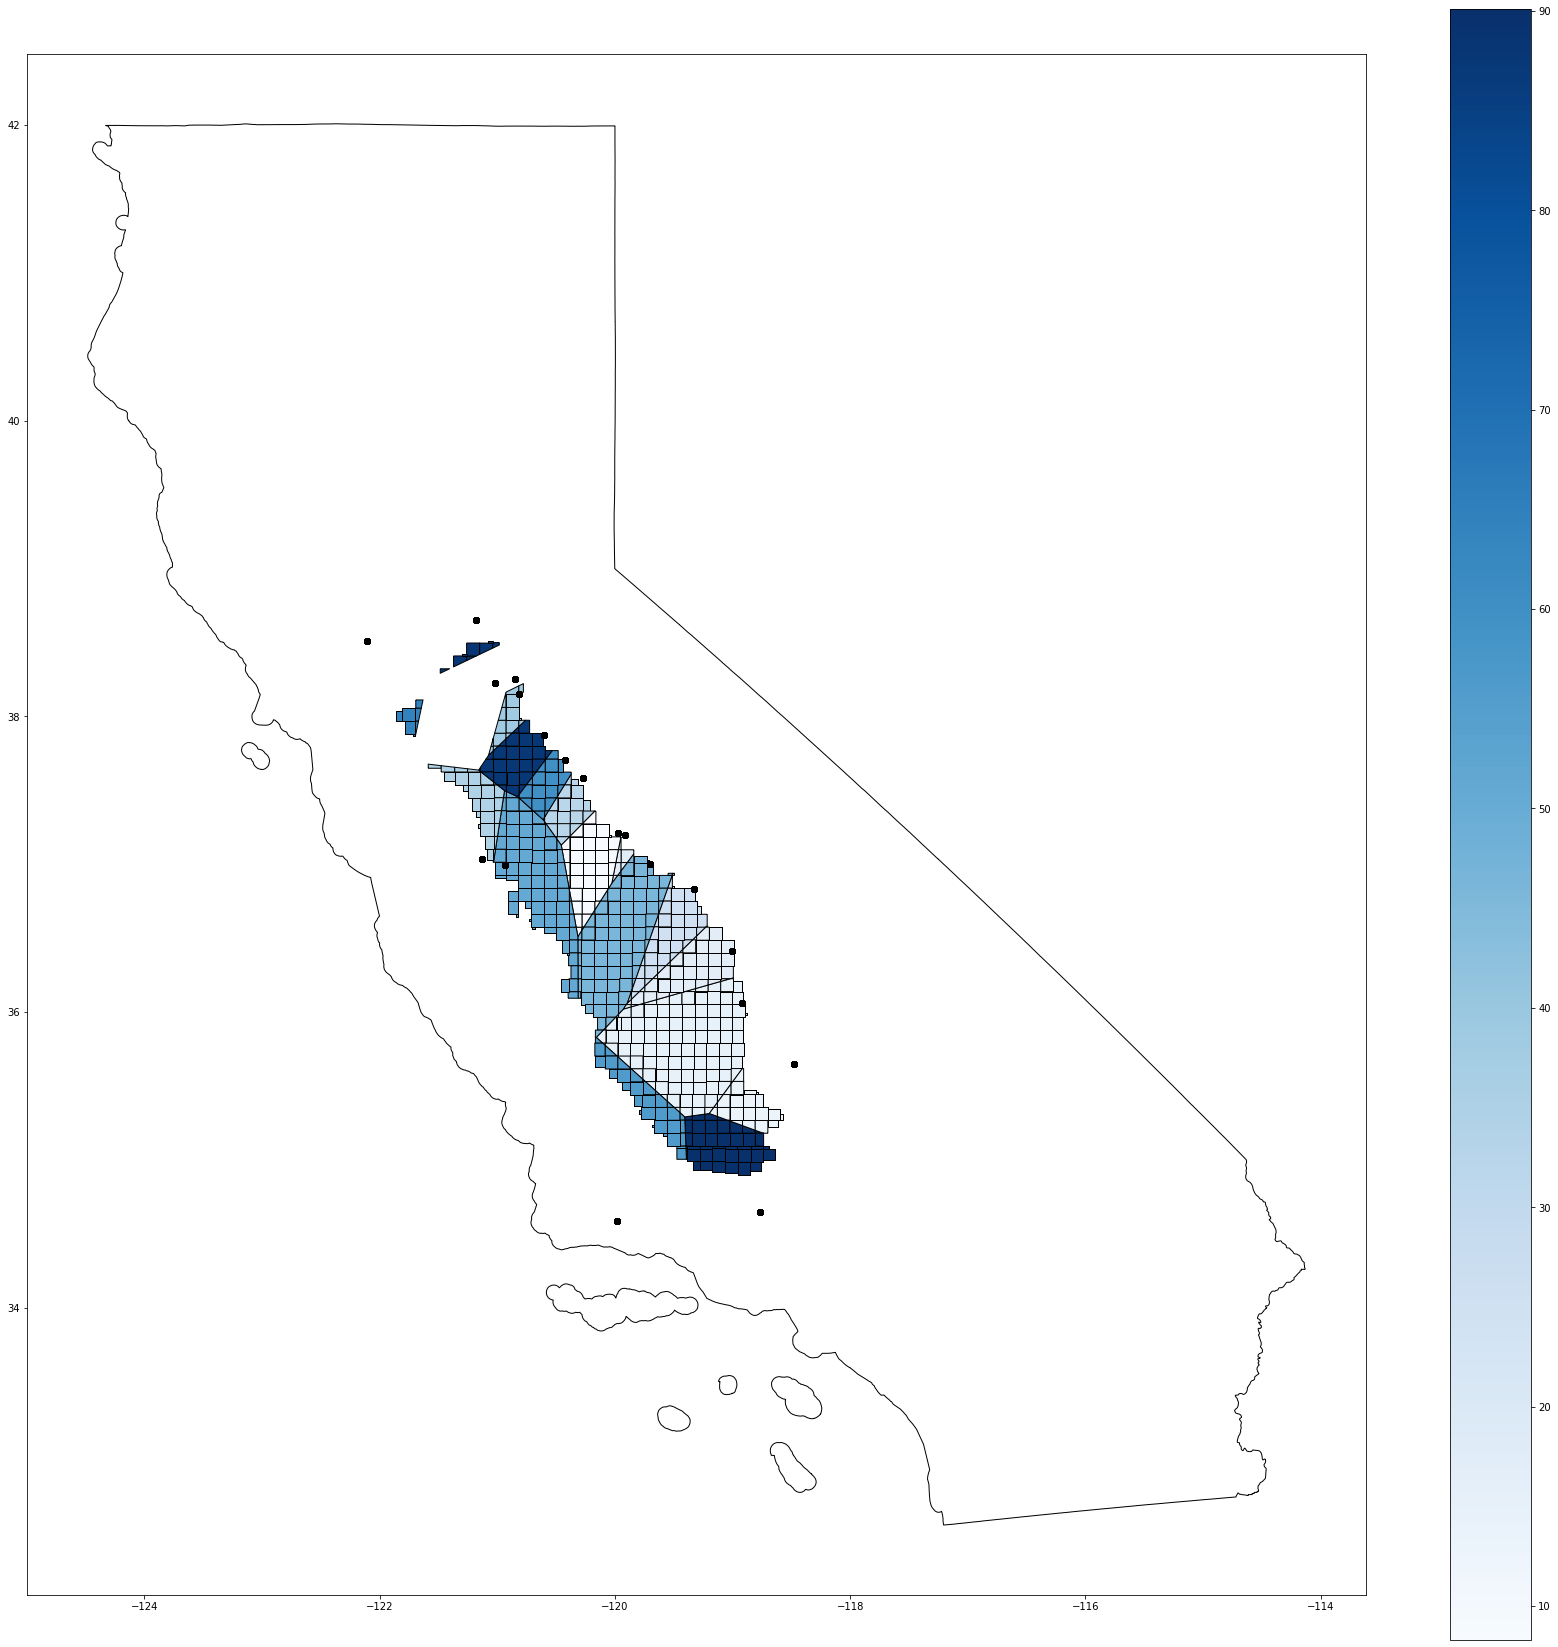

In [16]:
fig, ax = plt.subplots(figsize=(30,30))
reservoir_dataset.map_df[reservoir_dataset.map_df["YEAR"]==2021].plot(ax=ax, column="PCT_OF_CAPACITY",
                                                                              edgecolor='black', linewidth = 1, cmap="Blues", legend=True)
reservoir_dataset.map_df[reservoir_dataset.map_df["YEAR"]==2021].points.plot(ax=ax, facecolor="black", edgecolor='black', linewidth = 1)
reservoir_dataset.ca_boundaries.plot(ax=ax, facecolor="none", edgecolor='black', linewidth = 1, cmap=None, legend=None)
plt.show()

Because of the way we [transform point measurements of precipitation by weather stations into township reservoir percentage of capacity estimates](doc/etl/from_point_to_region_values.md),  Looking at their value average percent of capacity measurement per year, we get.

In [17]:
station_reservoir_per_year_df = reservoir_dataset.map_df[["YEAR", "PCT_OF_CAPACITY", "Reservoir Name"]].drop_duplicates()
alt.Chart(station_reservoir_per_year_df).mark_bar().encode( x="YEAR:N",y='PCT_OF_CAPACITY:Q', color='Reservoir Name:N')

alt.Chart(...)

We then compute the precipitation value at the Township level. As some townships cross several Voronoïd areas, for every year, for every Township we take the mean of the values of the Voronoïd areas crossing that Township.

In [18]:
reservoir_dataset.aggregate_feature_at_township_level(group_by_features=["TOWNSHIP", "YEAR"],
                                                          feature_to_aggregate_on="PCT_OF_CAPACITY")
reservoir_dataset.map_df

TOWNSHIP  YEAR                                           geometry  \
0    T01N R02E  2018  POLYGON ((-121.78743 37.88191, -121.78743 37.9...   
1    T01N R03E  2018  POLYGON ((-121.69654 37.88186, -121.69654 37.9...   
2    T01N R04E  2018  POLYGON ((-121.58708 37.97009, -121.47695 37.9...   
3    T01N R05E  2018  POLYGON ((-121.47750 37.97036, -121.36706 37.9...   
4    T01N R06E  2018  POLYGON ((-121.36722 37.97096, -121.25671 37.9...   
..         ...   ...                                                ...   
473  T32S R26E  2020  POLYGON ((-119.23510 35.17999, -119.12777 35.1...   
474  T32S R27E  2020  POLYGON ((-119.12837 35.17977, -119.02128 35.1...   
475  T32S R28E  2020  POLYGON ((-119.02170 35.17954, -118.91457 35.1...   
476  T32S R29E  2020  POLYGON ((-118.91470 35.18006, -118.80566 35.1...   
477  T32S R30E  2020  POLYGON ((-118.73539 35.09275, -118.80602 35.0...   

     PCT_OF_CAPACITY  
0          79.400000  
1          81.213158  
2          83.026316  
3          83.026316  
4          83.026316  
..               ...  
473        90.576923  
474        90.576923  
475        90.576923  
476        90.576923  
477        58.737441  

[2390 rows x 4 columns]

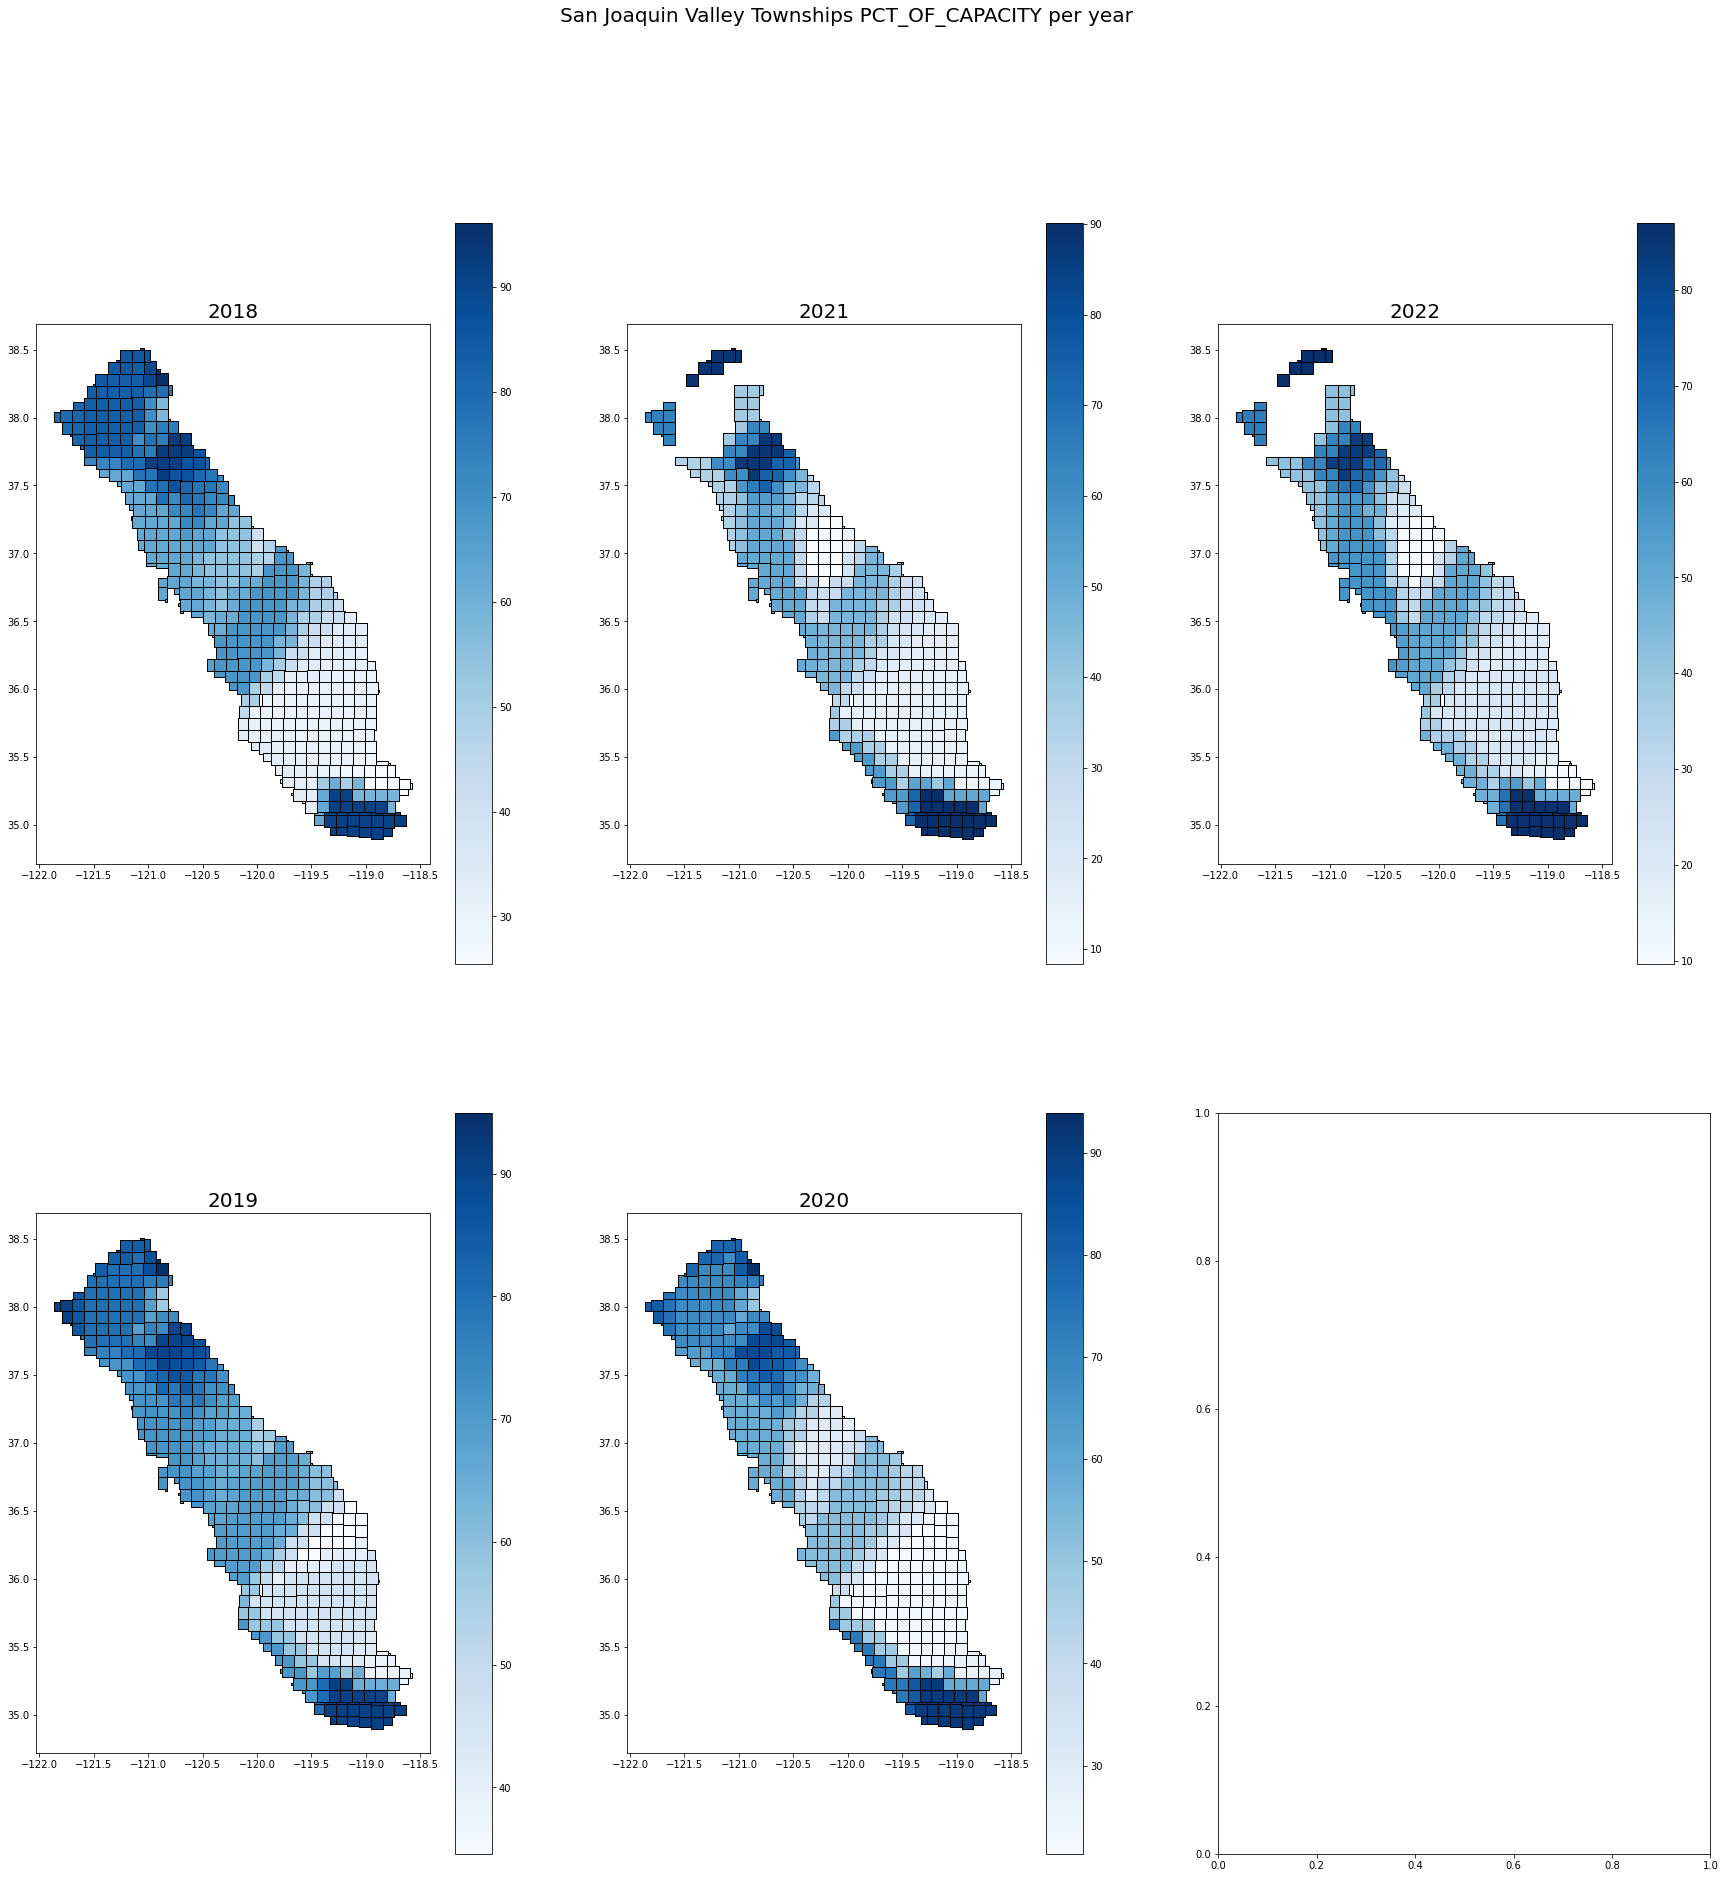

In [19]:
plot_townships_feature_per_year(reservoir_dataset.map_df, feature_name="PCT_OF_CAPACITY", cmap="Blues")

The dataset is ready for output

In [20]:
reservoir_dataset.prepare_output_from_map_df()
reservoir_dataset.output_df.to_csv("../assets/outputs/reservoir.csv")
reservoir_dataset.output_df

TOWNSHIP  YEAR  PCT_OF_CAPACITY
0    T01N R02E  2018        79.400000
1    T01N R03E  2018        81.213158
2    T01N R04E  2018        83.026316
3    T01N R05E  2018        83.026316
4    T01N R06E  2018        83.026316
..         ...   ...              ...
473  T32S R26E  2020        90.576923
474  T32S R27E  2020        90.576923
475  T32S R28E  2020        90.576923
476  T32S R29E  2020        90.576923
477  T32S R30E  2020        58.737441

[2390 rows x 3 columns]

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b042e2da-6536-449d-95b8-d85fa08825de' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>